# Homework 6 - Week 11

#### Problem 1

**(a)**
You are using a Geiger counter to locate a radiation source. Moving around in the room where you believe the source is located, you are recording $50$ counts-per-minute (CPM) at one location. When you move $50 cm$ in one direction, the reading on the Geiger counter increases to $62.5 CPM$.

NOTE: You can neglect any background radiation considerations for all parts.

Assuming there is nothing in between you and the source, what is the distance to the source?

**(b)**
What count rate would you measure directly from the source (estimate this by calculating the count rate at $5 cm$).

**(c)**
If you see that the distance you estimated in part one would put the source on the other side of a concrete wall, does this change your estimate of the position of the source? Would it change your estimate of the count rate you would measure right next to the source (at $5 cm$)? Taking the wall thickness to be $20 cm$, and the linear attenuation coefficient for gamma radiation through concrete to be $0.15/cm$, update your answers for parts (a) and (b) accordingly.


A: 4.74 Meters
B:450,000 CPM
C:It would change my count rate, but not my position. My position would be the same but my count would be 22,500 CPM

#### Problem 2

Remembering that the rule of thumb for counting statistics only applies to total counts, meaning you then need to propogate that uncertainty to get the uncertainty on any CPM values stated, we will now concider how uncertainties would impact our results for problem 1.

**(a)**
If the estimates for the CPM values measured at each position in the first problem were made by collecting counts over 10 minutes, what is the uncertainty on the two CPM measurements?

**(b)**
What would be the resulting uncertainty on the distance to the source calculated in part **1.a**?

NOTE 1: For $F(x) = C\sqrt{x}$, the percent uncertainty on $F$ can be determined using $(\frac{\sigma_F}{F})^2 \approx (\frac{\sigma_x}{2x})^2$. <br>
NOTE 2: NOTE 1 is a good approximation even if you instead have a function that depends on $\sqrt{x}$ in some non-linear way (e.g. $\frac{1}{(1-\sqrt{x})}$). <br>
NOTE 3: Similarly, for $F = A/B$ where both $A$ and $B$ have uncertainties, $(\frac{\sigma_F}{F})^2 \approx (\frac{\sigma_A}{A})^2 + (\frac{\sigma_B}{B})^2$.

**(c)**
What would be the uncertainty on your calculation of the count-rate from the source (at $5 cm$)?

a: The uncertainty of the two meansurements are 2.24 for the 50cpm and 2.5 for the 62.5 cpm.
b: The uncertainty of the distance is about 1.2m
c: The uncertainty for the source is 230,000 CPM

#### Problem 3

Please include your lab work here - including all data plots and calculations for the attenuation coefficients for your different materials. This portion of the homework can be copied from your shared lab work.

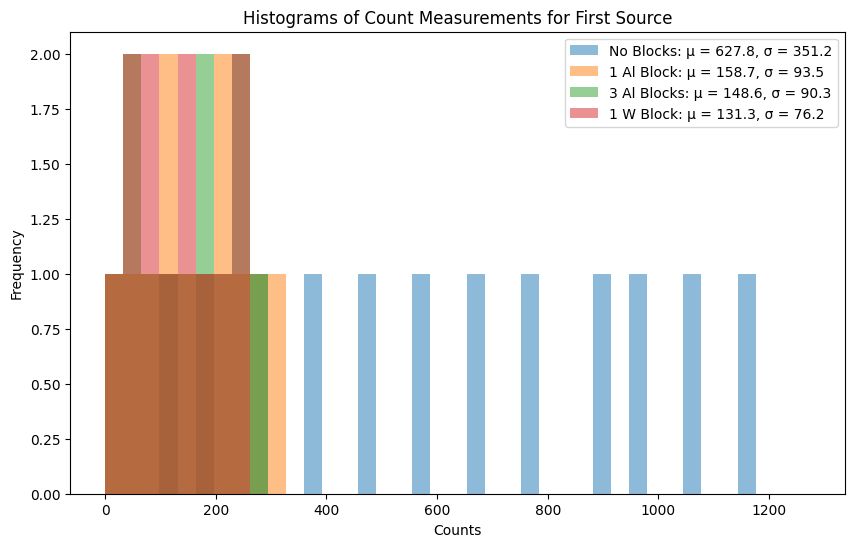

No Blocks -> Mean: 627.8, Standard Deviation: 351.2
1 Al Block -> Mean: 158.7, Standard Deviation: 93.5
3 Al Blocks -> Mean: 148.6, Standard Deviation: 90.3
1 W Block -> Mean: 131.3, Standard Deviation: 76.2


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

files = {
    'No Blocks': '/content/sample_data/RadiationDatanone.csv',
    '1 Al Block': '/content/sample_data/RadiationData1.csv',
    '3 Al Blocks': '/content/sample_data/RadiationData2.csv',
    '1 W Block': '/content/sample_data/RadiationData3.csv'
}

stats = {}

plt.figure(figsize=(10, 6))

max_count = 0
for fname in files.values():
    df_temp = pd.read_csv(fname)
    max_count = max(max_count, df_temp['count'].max())
bins = np.linspace(0, 1.1 * max_count, 40)

for label, fname in files.items():
    df = pd.read_csv(fname)
    counts = df['count']
    mu = counts.mean()
    sigma = counts.std()
    stats[label] = (mu, sigma)

    plt.hist(counts, bins=bins, alpha=0.5, label=f"{label}: μ = {mu:.1f}, σ = {sigma:.1f}")

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histograms of Count Measurements for First Source')
plt.legend()
plt.show()

# Print the statistics for clarity
for label, (mu, sigma) in stats.items():
    print(f"{label} -> Mean: {mu:.1f}, Standard Deviation: {sigma:.1f}")

a: The deviations are close to what I expected from the uncertainty
B: I expect to see counts decrease as more blockage is added, on a reverese exponential curve.

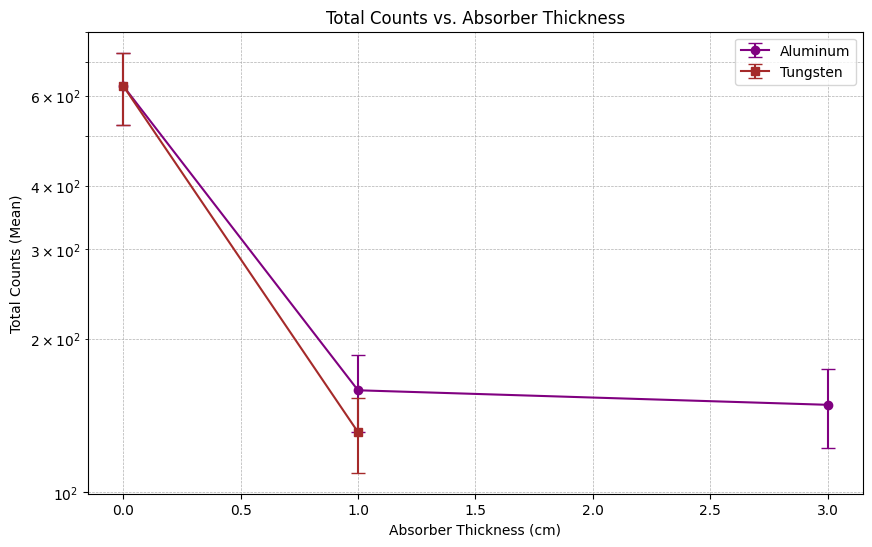

In [11]:
def calc_mean_uncertainty(fname):
    """
    Reads a CSV file and returns the mean and uncertainty of the 'count' values.
    The uncertainty is computed as the standard deviation divided by sqrt(number of measurements).
    """
    df = pd.read_csv(fname)
    counts = df['count']
    mean_val = counts.mean()
    uncertainty = counts.std() / np.sqrt(len(counts))
    return mean_val, uncertainty

al_labels = ['No Blocks', '1 Al Block', '3 Al Blocks']
thickness_al = np.array([0.0, 1.0, 3.0])
mean_al = []
unc_al = []
for label in al_labels:
    mean_val, uncertainty = calc_mean_uncertainty(files[label])
    mean_al.append(mean_val)
    unc_al.append(uncertainty)
mean_al = np.array(mean_al)
unc_al  = np.array(unc_al)

w_labels = ['No Blocks', '1 W Block']
thickness_w = np.array([0.0, 1.0])
mean_w = []
unc_w = []
for label in w_labels:
    mean_val, uncertainty = calc_mean_uncertainty(files[label])
    mean_w.append(mean_val)
    unc_w.append(uncertainty)
mean_w = np.array(mean_w)
unc_w = np.array(unc_w)

plt.figure(figsize=(10, 6))

plt.errorbar(thickness_al, mean_al, yerr=unc_al, fmt='o-', capsize=5, label='Aluminum', color='purple')


plt.errorbar(thickness_w, mean_w, yerr=unc_w, fmt='s-', capsize=5, label='Tungsten', color='brown')


plt.yscale('log')


plt.xlabel('Absorber Thickness (cm)')
plt.ylabel('Total Counts (Mean)')
plt.title('Total Counts vs. Absorber Thickness')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)

plt.show()

The data follows as predicted of an inverse exponential function of counts, this makes sense as it blocks both alpha and beta decay depending on more blockage, but gamma still leaks through.

In [12]:
import numpy as np

# Replace these with your actual calculated means!
I0_Al = mean_al[0]   # No Blocks
I_Al  = mean_al[2]   # 3 Al Blocks
x_Al  = 3.0          # cm

mu_Al = (1 / x_Al) * np.log(I0_Al / I_Al)
print(f"Absorption coefficient for Aluminum: {mu_Al:.4f} cm⁻¹")

I0_W = mean_w[0]     # No Blocks
I_W  = mean_w[1]     # 1 W Block
x_W  = 1.0           # cm

mu_W = (1 / x_W) * np.log(I0_W / I_W)
print(f"Absorption coefficient for Tungsten: {mu_W:.4f} cm⁻¹")

Absorption coefficient for Aluminum: 0.4804 cm⁻¹
Absorption coefficient for Tungsten: 1.5645 cm⁻¹


Didn't have a second source